# Tutorial: Python, Pandas y Seaborn para Social Data Science

## Análisis de Datos del Censo Boliviano 2012-2024

En este tutorial aprenderemos a usar Python, pandas y seaborn para analizar datos sociales utilizando información del censo boliviano que compara la población entre 2012 y 2024.

### Objetivos del Tutorial:
1. Cargar y explorar datos con pandas
2. Realizar análisis descriptivo básico
3. Crear visualizaciones informativas con seaborn
4. Interpretar resultados desde una perspectiva de ciencias sociales

---

## 1. Importación de Librerías

Comenzamos importando las librerías esenciales para el análisis de datos sociales:

In [1]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para gráficos
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Configuración para mostrar todos los decimales en pandas
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


## 2. Carga y Exploración Inicial de Datos

Carguemos el dataset del censo boliviano y exploremos su estructura:

In [2]:
# Cargar los datos
df = pd.read_csv('data/censobo-2012-2024.csv')

# Información básica del dataset
print("📊 Información básica del dataset:")
print(f"- Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"- Columnas: {list(df.columns)}")
print("\n" + "="*50)

# Primeras filas
print("\n📋 Primeras 5 filas:")
df.head()

📊 Información básica del dataset:
- Dimensiones: 339 filas × 8 columnas
- Columnas: ['municipio', 'departamento', 'pob_2012', 'pob_2024', 'diferencia', 'incremento_porcentual', 'proy_2022', 'dif_proy']


📋 Primeras 5 filas:


,municipio,departamento,pob_2012,pob_2024,diferencia,incremento_porcentual,proy_2022,dif_proy
0,Colquechaca,Potosí,35199,16163,-19036,-54.08,36106,-19943
1,Tomave,Potosí,14789,7811,-6978,-47.18,13255,-5444
2,Nueva Esperanza,Pando,2068,1390,-678,-32.79,1840,-450
3,Pazña,Oruro,5955,4220,-1735,-29.14,5412,-1192
4,Acasio,Potosí,6161,4434,-1727,-28.03,5618,-1184


In [3]:
# Exploración más detallada
print("🔍 Exploración detallada del dataset:")
print("\n📊 Información de tipos de datos:")
print(df.dtypes)

print("\n📈 Estadísticas descriptivas:")
df.describe()

🔍 Exploración detallada del dataset:

📊 Información de tipos de datos:
municipio                 object
departamento              object
pob_2012                   int64
pob_2024                   int64
diferencia                 int64
incremento_porcentual    float64
proy_2022                  int64
dif_proy                   int64
dtype: object

📈 Estadísticas descriptivas:


,pob_2012,pob_2024,diferencia,incremento_porcentual,proy_2022,dif_proy
count,339.00,339.00,339.00,339.00,339.00,339.00
mean,29675.09,33256.39,3581.30,16.79,35416.02,-2159.63
std,108254.36,116852.62,11750.57,40.99,141842.46,26766.23
min,509.00,882.00,-19036.00,-54.08,381.00,-296727.00
25%,5960.00,6674.50,-128.00,-1.40,5628.00,-793.00
50%,10750.00,12216.00,1022.00,11.89,9899.00,871.00
75%,19724.50,20861.50,2944.50,25.71,20085.00,2906.50
max,1454539.00,1606671.00,152132.00,544.59,1903398.00,33909.00


## 3. Análisis Descriptivo con Pandas

Ahora analizaremos los datos desde una perspectiva de ciencias sociales:

In [4]:
# Análisis por departamento
print("🏛️ ANÁLISIS POR DEPARTAMENTO")
print("="*40)

# Conteo de municipios por departamento
municipios_por_depto = df['departamento'].value_counts()
print("\n📍 Número de municipios por departamento:")
print(municipios_por_depto)

print("\n💹 Promedio de cambio poblacional por departamento:")
cambio_por_depto = df.groupby('departamento')['incremento_porcentual'].agg(['mean', 'count']).round(2)
cambio_por_depto.columns = ['Promedio_%_cambio', 'N_municipios']
print(cambio_por_depto.sort_values('Promedio_%_cambio', ascending=False))

🏛️ ANÁLISIS POR DEPARTAMENTO

📍 Número de municipios por departamento:
La Paz        87
Santa Cruz    56
Cochabamba    47
Potosí        40
Oruro         35
Chuquisaca    29
Beni          19
Pando         15
Tarija        11
Name: departamento, dtype: int64

💹 Promedio de cambio poblacional por departamento:
              Promedio_%_cambio  N_municipios
departamento                                 
Oruro                     35.97            35
La Paz                    30.09            87
Santa Cruz                14.66            56
Pando                     14.65            15
Cochabamba                12.49            47
Beni                      11.64            19
Tarija                     3.83            11
Chuquisaca                -0.35            29
Potosí                    -1.66            40


In [5]:
# Identificar municipios con mayor crecimiento y decrecimiento
print("📈 MUNICIPIOS CON MAYOR CRECIMIENTO:")
print("="*40)
top_crecimiento = df.nlargest(5, 'incremento_porcentual')[['municipio', 'departamento', 'incremento_porcentual', 'pob_2012', 'pob_2024']]
print(top_crecimiento.to_string(index=False))

print("\n📉 MUNICIPIOS CON MAYOR DECRECIMIENTO:")
print("="*40)
top_decrecimiento = df.nsmallest(5, 'incremento_porcentual')[['municipio', 'departamento', 'incremento_porcentual', 'pob_2012', 'pob_2024']]
print(top_decrecimiento.to_string(index=False))

📈 MUNICIPIOS CON MAYOR CRECIMIENTO:
          municipio departamento  incremento_porcentual  pob_2012  pob_2024
Nazacara de Pacajes       La Paz                 544.59       619      3990
        Huachacalla        Oruro                 296.21      1003      3974
          La Rivera        Oruro                 148.72       509      1266
             Cotoca   Santa Cruz                 133.51     45519    106292
          Achocalla       La Paz                 107.71     22179     46068

📉 MUNICIPIOS CON MAYOR DECRECIMIENTO:
      municipio departamento  incremento_porcentual  pob_2012  pob_2024
    Colquechaca       Potosí                 -54.08     35199     16163
         Tomave       Potosí                 -47.18     14789      7811
Nueva Esperanza        Pando                 -32.79      2068      1390
          Pazña        Oruro                 -29.14      5955      4220
         Acasio       Potosí                 -28.03      6161      4434


## 4. Visualización de Datos con Seaborn

Creemos visualizaciones que nos ayuden a entender mejor los patrones demográficos:

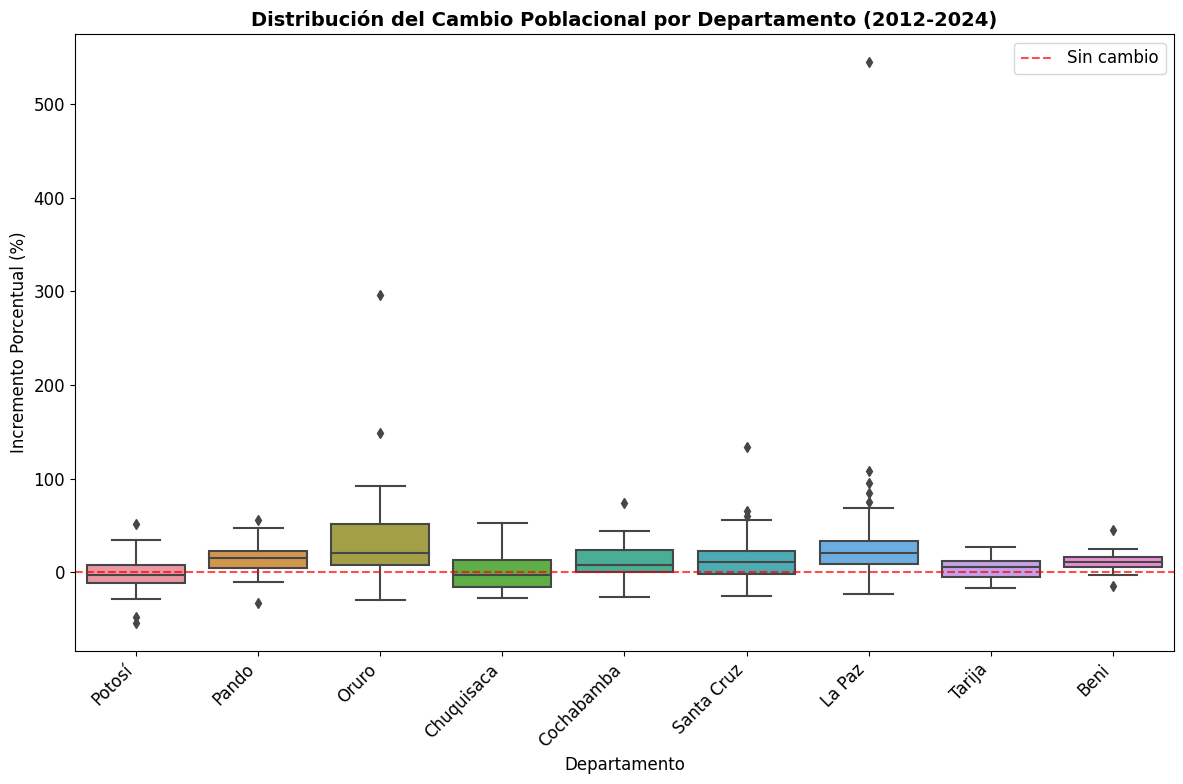

In [6]:
# 1. Distribución del cambio poblacional por departamento
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='departamento', y='incremento_porcentual')
plt.xticks(rotation=45, ha='right')
plt.title('Distribución del Cambio Poblacional por Departamento (2012-2024)', fontsize=14, fontweight='bold')
plt.ylabel('Incremento Porcentual (%)')
plt.xlabel('Departamento')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7, label='Sin cambio')
plt.legend()
plt.tight_layout()
plt.show()

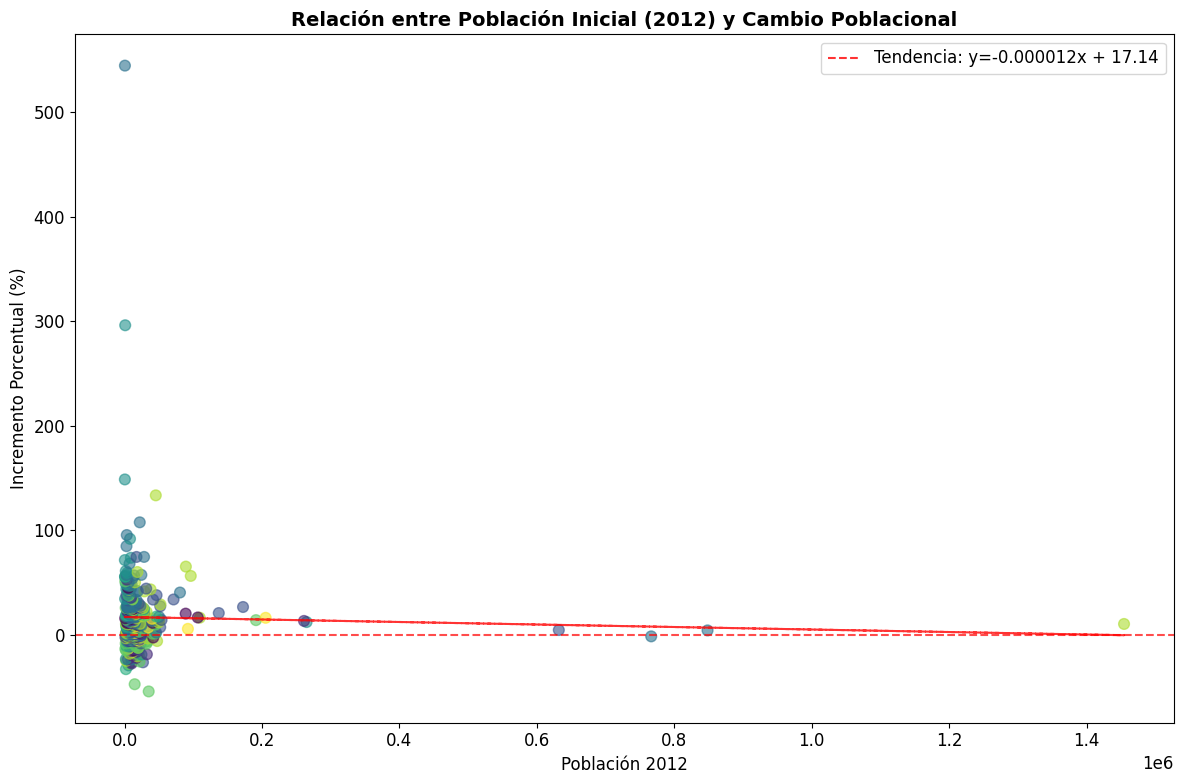

💡 Correlación entre población 2012 e incremento porcentual: -0.032


In [7]:
# 2. Relación entre población inicial y cambio porcentual
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['pob_2012'], df['incremento_porcentual'], 
                     c=df['departamento'].astype('category').cat.codes, 
                     alpha=0.6, s=60)
plt.xlabel('Población 2012')
plt.ylabel('Incremento Porcentual (%)')
plt.title('Relación entre Población Inicial (2012) y Cambio Poblacional', fontsize=14, fontweight='bold')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)

# Agregar línea de tendencia
z = np.polyfit(df['pob_2012'], df['incremento_porcentual'], 1)
p = np.poly1d(z)
plt.plot(df['pob_2012'], p(df['pob_2012']), "r--", alpha=0.8, label=f'Tendencia: y={z[0]:.6f}x + {z[1]:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

print(f"💡 Correlación entre población 2012 e incremento porcentual: {df['pob_2012'].corr(df['incremento_porcentual']):.3f}")

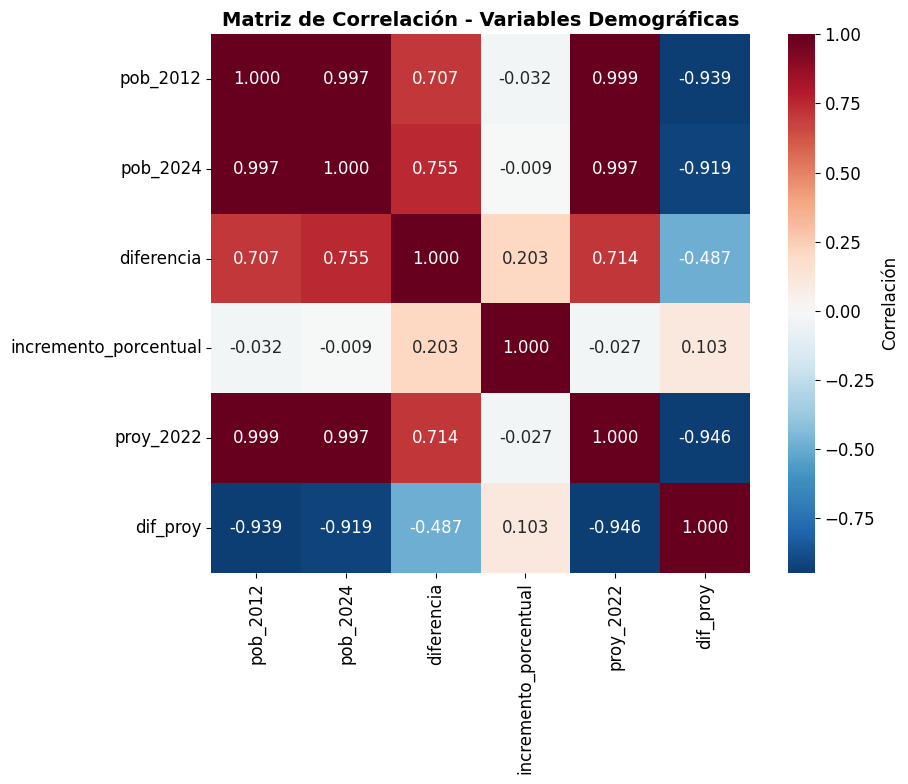

In [8]:
# 3. Mapa de calor de correlaciones
plt.figure(figsize=(10, 8))
# Seleccionar solo variables numéricas
numeric_cols = ['pob_2012', 'pob_2024', 'diferencia', 'incremento_porcentual', 'proy_2022', 'dif_proy']
correlation_matrix = df[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, fmt='.3f', cbar_kws={'label': 'Correlación'})
plt.title('Matriz de Correlación - Variables Demográficas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 5. Análisis Avanzado: Categorización de Municipios

Creemos categorías basadas en el cambio poblacional para facilitar el análisis:

📊 DISTRIBUCIÓN POR CATEGORÍAS DE CAMBIO POBLACIONAL
Crecimiento Moderado (10-50%)           155
Estable (-10% a 10%)                    116
Decrecimiento Moderado (-25% a -10%)     30
Crecimiento Alto (>50%)                  29
Decrecimiento Alto (<-25%)                9
Name: categoria_cambio, dtype: int64

Total de municipios: 339


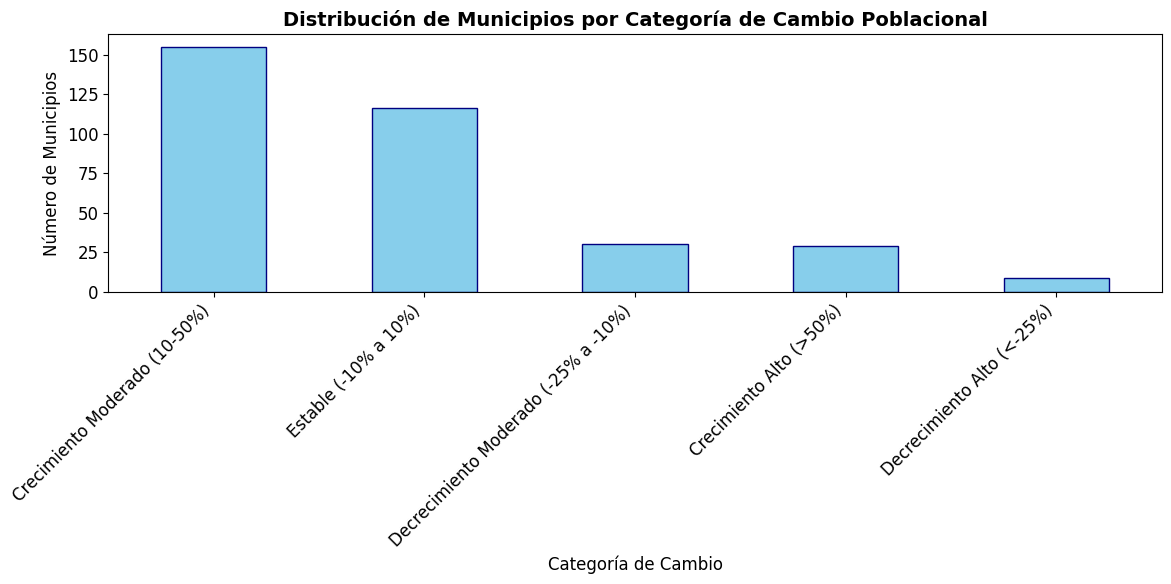

In [9]:
# Crear categorías de cambio poblacional
def categorizar_cambio(incremento):
    if incremento > 50:
        return "Crecimiento Alto (>50%)"
    elif incremento > 10:
        return "Crecimiento Moderado (10-50%)"
    elif incremento > -10:
        return "Estable (-10% a 10%)"
    elif incremento > -25:
        return "Decrecimiento Moderado (-25% a -10%)"
    else:
        return "Decrecimiento Alto (<-25%)"

df['categoria_cambio'] = df['incremento_porcentual'].apply(categorizar_cambio)

# Análisis por categorías
print("📊 DISTRIBUCIÓN POR CATEGORÍAS DE CAMBIO POBLACIONAL")
print("="*60)
categoria_counts = df['categoria_cambio'].value_counts()
print(categoria_counts)
print(f"\nTotal de municipios: {len(df)}")

# Visualización de las categorías
plt.figure(figsize=(12, 6))
categoria_counts.plot(kind='bar', color='skyblue', edgecolor='navy')
plt.title('Distribución de Municipios por Categoría de Cambio Poblacional', fontsize=14, fontweight='bold')
plt.ylabel('Número de Municipios')
plt.xlabel('Categoría de Cambio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

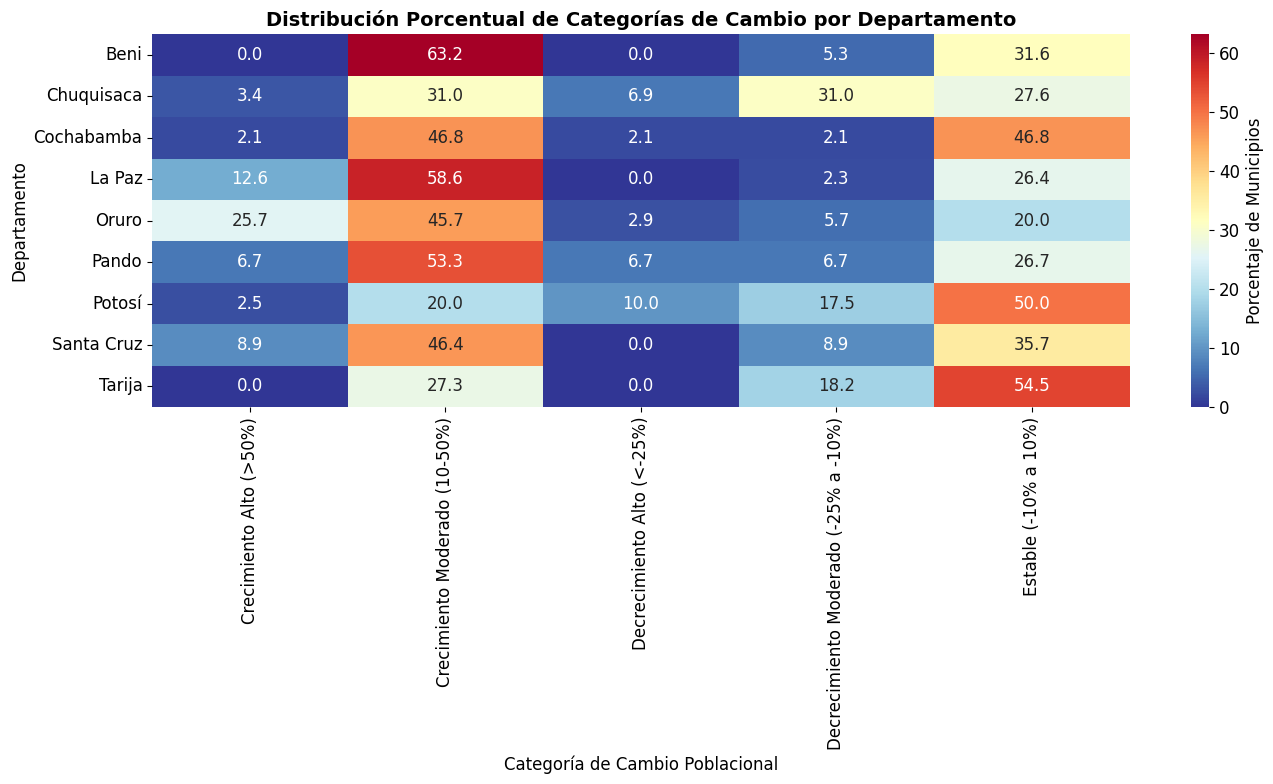

In [10]:
# Análisis por categorías y departamento
plt.figure(figsize=(14, 8))
category_dept = pd.crosstab(df['departamento'], df['categoria_cambio'])
category_dept_pct = category_dept.div(category_dept.sum(1), axis=0) * 100

sns.heatmap(category_dept_pct, annot=True, fmt='.1f', cmap='RdYlBu_r', 
            cbar_kws={'label': 'Porcentaje de Municipios'})
plt.title('Distribución Porcentual de Categorías de Cambio por Departamento', fontsize=14, fontweight='bold')
plt.xlabel('Categoría de Cambio Poblacional')
plt.ylabel('Departamento')
plt.tight_layout()
plt.show()

## 6. Conclusiones e Interpretación Sociológica

Resumamos los hallazgos principales desde una perspectiva de ciencias sociales:

In [11]:
# Resumen ejecutivo de hallazgos
print("🎯 RESUMEN EJECUTIVO - ANÁLISIS DEMOGRÁFICO BOLIVIA 2012-2024")
print("=" * 65)

print("\n📈 DEPARTAMENTOS CON MAYOR CRECIMIENTO:")
top_growth = df.groupby('departamento')['incremento_porcentual'].mean().sort_values(ascending=False).head(3)
for dept, pct in top_growth.items():
    print(f"• {dept}: {pct:.1f}% promedio")

print("\n📉 DEPARTAMENTOS CON MAYOR DECRECIMIENTO:")
bottom_growth = df.groupby('departamento')['incremento_porcentual'].mean().sort_values(ascending=True).head(3)
for dept, pct in bottom_growth.items():
    print(f"• {dept}: {pct:.1f}% promedio")

print(f"\n🏘️ DISTRIBUCIÓN GENERAL:")
total_municipios = len(df)
crecimiento = len(df[df['incremento_porcentual'] > 0])
decrecimiento = len(df[df['incremento_porcentual'] < 0])
estable = total_municipios - crecimiento - decrecimiento

print(f"• {crecimiento} municipios en crecimiento ({crecimiento/total_municipios*100:.1f}%)")
print(f"• {decrecimiento} municipios en decrecimiento ({decrecimiento/total_municipios*100:.1f}%)")
print(f"• {estable} municipios estables ({estable/total_municipios*100:.1f}%)")

print(f"\n💡 CORRELACIÓN CLAVE:")
print(f"• La población inicial NO predice el cambio poblacional (r = {df['pob_2012'].corr(df['incremento_porcentual']):.3f})")
print(f"• Esto sugiere que factores cualitativos (económicos, sociales) son más determinantes")

🎯 RESUMEN EJECUTIVO - ANÁLISIS DEMOGRÁFICO BOLIVIA 2012-2024

📈 DEPARTAMENTOS CON MAYOR CRECIMIENTO:
• Oruro: 36.0% promedio
• La Paz: 30.1% promedio
• Santa Cruz: 14.7% promedio

📉 DEPARTAMENTOS CON MAYOR DECRECIMIENTO:
• Potosí: -1.7% promedio
• Chuquisaca: -0.4% promedio
• Tarija: 3.8% promedio

🏘️ DISTRIBUCIÓN GENERAL:
• 243 municipios en crecimiento (71.7%)
• 95 municipios en decrecimiento (28.0%)
• 1 municipios estables (0.3%)

💡 CORRELACIÓN CLAVE:
• La población inicial NO predice el cambio poblacional (r = -0.032)
• Esto sugiere que factores cualitativos (económicos, sociales) son más determinantes


## 7. Técnicas Aprendidas y Próximos Pasos

### 🛠️ Técnicas de Python/Pandas/Seaborn utilizadas en este tutorial:

**Pandas:**
- `pd.read_csv()` - Carga de datos
- `df.describe()` - Estadísticas descriptivas
- `df.groupby()` - Agrupación y agregación
- `df.value_counts()` - Conteo de frecuencias
- `pd.crosstab()` - Tablas cruzadas
- `df.corr()` - Matriz de correlación
- `df.apply()` - Aplicación de funciones personalizadas

**Seaborn/Matplotlib:**
- `sns.boxplot()` - Diagramas de caja
- `sns.heatmap()` - Mapas de calor
- `plt.scatter()` - Diagramas de dispersión
- Configuración de estilos y colores

**Análisis Social:**
- Categorización de datos cuantitativos
- Análisis territorial comparativo
- Interpretación de patrones demográficos

### 🚀 Próximos pasos para profundizar:
1. **Análisis temporal:** Incorporar más años de datos
2. **Variables explicativas:** Agregar datos económicos, educacionales
3. **Análisis espacial:** Mapas interactivos con folium
4. **Modelos predictivos:** Machine learning para proyecciones
5. **Análisis de redes:** Flujos migratorios entre municipios

---

**¡Felicidades!** Has completado un análisis completo de datos sociales usando Python, pandas y seaborn. Estas herramientas son fundamentales para cualquier científico social en la era digital.